In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df_train_balanced_original = pd.read_csv("../preprocessing/df_train_balanced.csv")
val_df_original = pd.read_csv("../preprocessing/val_df.csv")

In [10]:
import os
import json
import matplotlib.pyplot as plt

def load_histories(directory):
    histories = {}
    for fname in os.listdir(directory):
        if fname.endswith('_history.json'):
            model_name = fname.replace('_history.json', '')
            with open(os.path.join(directory, fname), 'r') as f:
                history = json.load(f)
            histories[model_name] = history
    return histories

def summarize_histories(histories):
    summary = []
    for model, hist in histories.items():
        acc = hist.get('sparse_categorical_accuracy', [])
        val_acc = hist.get('val_sparse_categorical_accuracy', [])
        loss = hist.get('loss', [])
        val_loss = hist.get('val_loss', [])
        summary.append({
            'model': model,
            'lowest_train_loss': min(loss) if loss else None,
            'best_train_acc': max(acc) if acc else None,
            'lowest_val_loss': min(val_loss) if val_loss else None,
            'best_val_acc': max(val_acc) if val_acc else None,
            'generalization_gap': acc[-1] - val_acc[-1] if acc and val_acc else None,
        })
    return summary

def plot_histories(histories):
    for model, hist in histories.items():
        epochs = range(1, len(hist['loss']) + 1)

        plt.figure(figsize=(12, 5))
        plt.suptitle(f"Training History for {model}", fontsize=16)

        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(epochs, hist.get('sparse_categorical_accuracy', []), label='Train Acc')
        plt.plot(epochs, hist.get('val_sparse_categorical_accuracy', []), label='Val Acc')
        plt.title('Accuracy', fontsize=14)
        plt.xlabel('Epochs', fontsize=14)
        plt.ylabel('Accuracy', fontsize=14)
        plt.legend()

        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(epochs, hist.get('loss', []), label='Train Loss')
        plt.plot(epochs, hist.get('val_loss', []), label='Val Loss')
        plt.title('Loss', fontsize=14)
        plt.xlabel('Epochs', fontsize=14)
        plt.ylabel('Loss', fontsize=14)
        plt.legend()

        plt.tight_layout()
        plt.show()



{'model': 'efficientnetb0_b128l5lr', 'lowest_train_loss': 1.4670122861862183, 'best_train_acc': 0.6645879745483398, 'lowest_val_loss': 1.6105961799621582, 'best_val_acc': 0.6135368347167969, 'generalization_gap': 0.05099284648895264}
{'model': 'efficientnetb0_b128l5', 'lowest_train_loss': 1.5993170738220215, 'best_train_acc': 0.6343207359313965, 'lowest_val_loss': 1.6705108880996704, 'best_val_acc': 0.6063187718391418, 'generalization_gap': 0.027032792568206787}
{'model': 'efficientnetb0_b128l10', 'lowest_train_loss': 1.5510032176971436, 'best_train_acc': 0.6476355195045471, 'lowest_val_loss': 1.653936743736267, 'best_val_acc': 0.6059637665748596, 'generalization_gap': 0.042204201221466064}
{'model': 'convnexttiny_l5lr', 'lowest_train_loss': 1.7255218029022217, 'best_train_acc': 0.5807104110717773, 'lowest_val_loss': 1.68782377243042, 'best_val_acc': 0.5837770700454712, 'generalization_gap': -0.00369185209274292}
{'model': 'convnexttiny_l5', 'lowest_train_loss': 1.832198977470398, 'bes

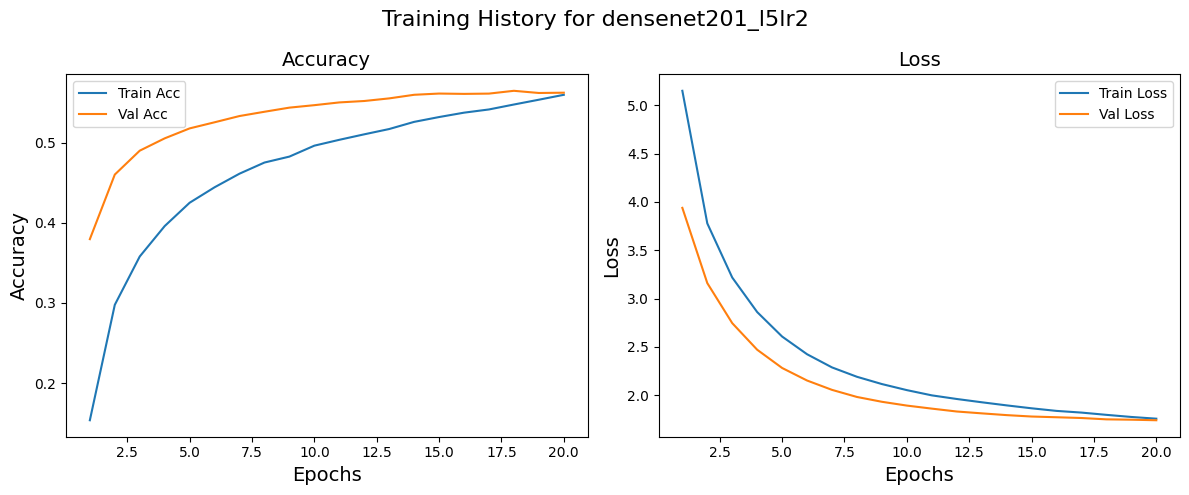

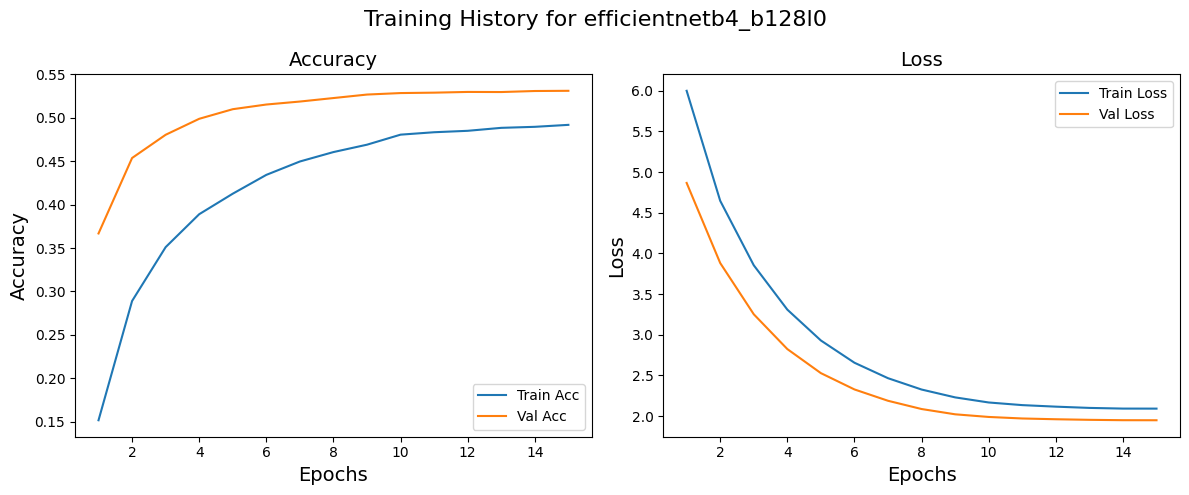

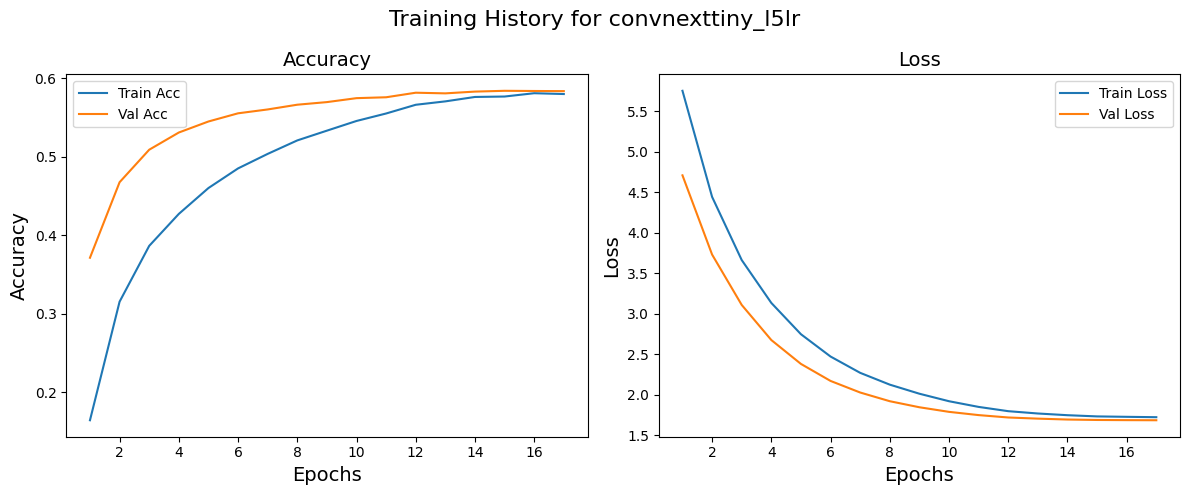

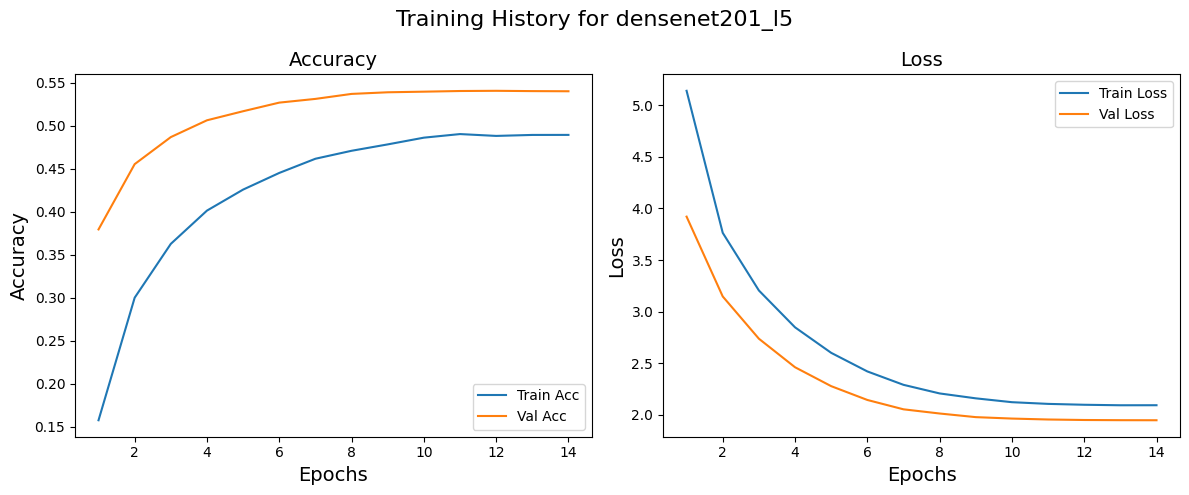

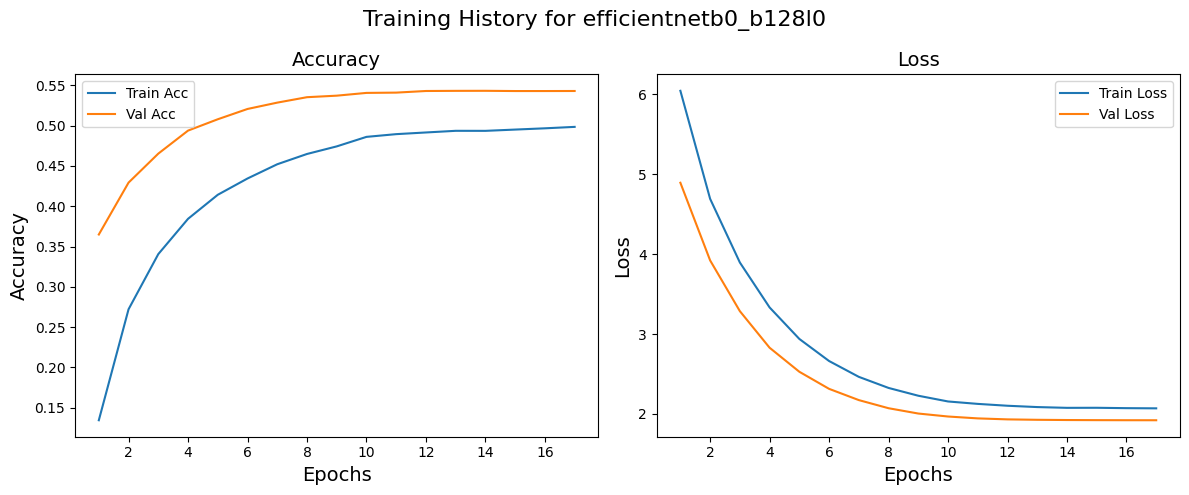

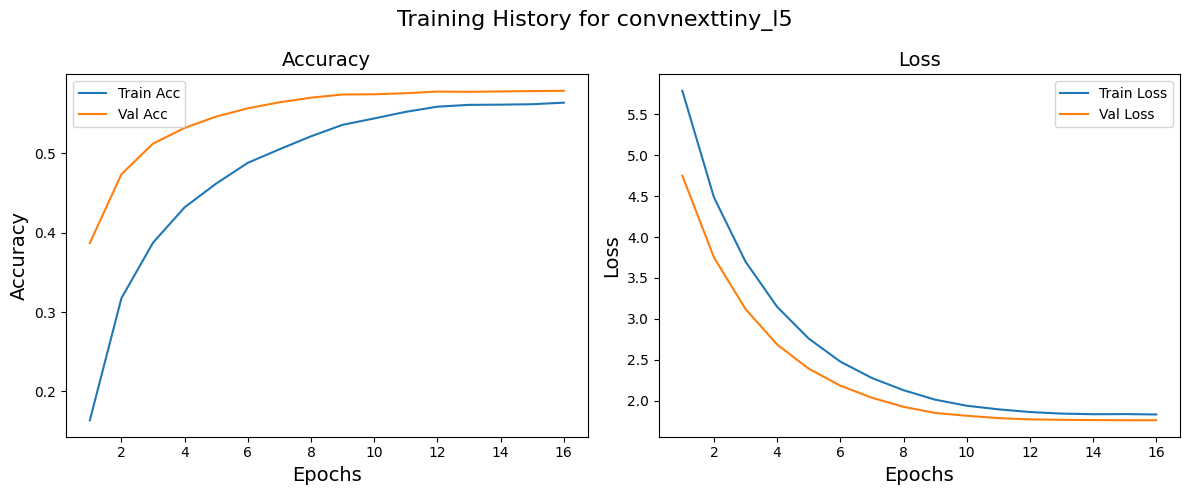

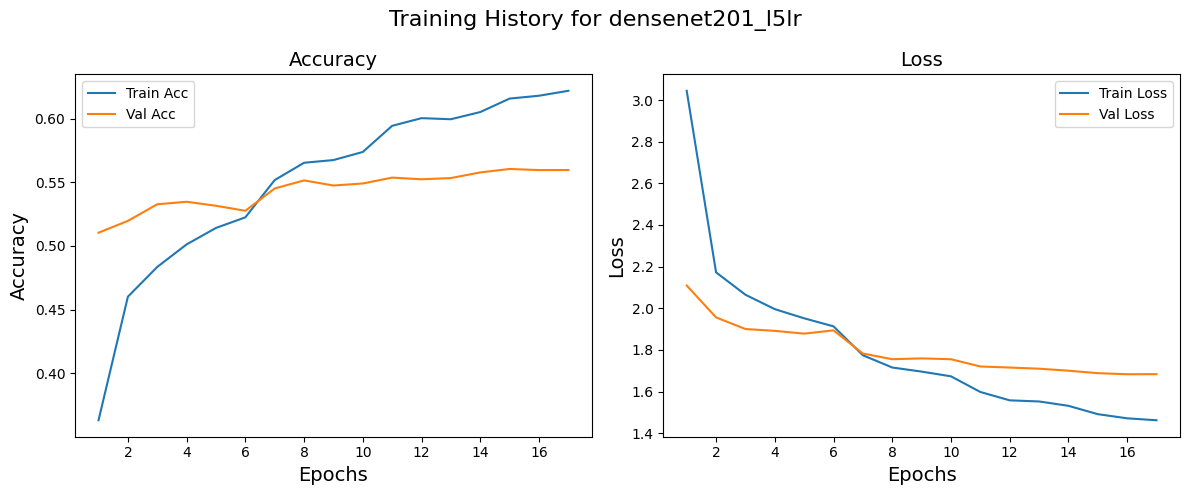

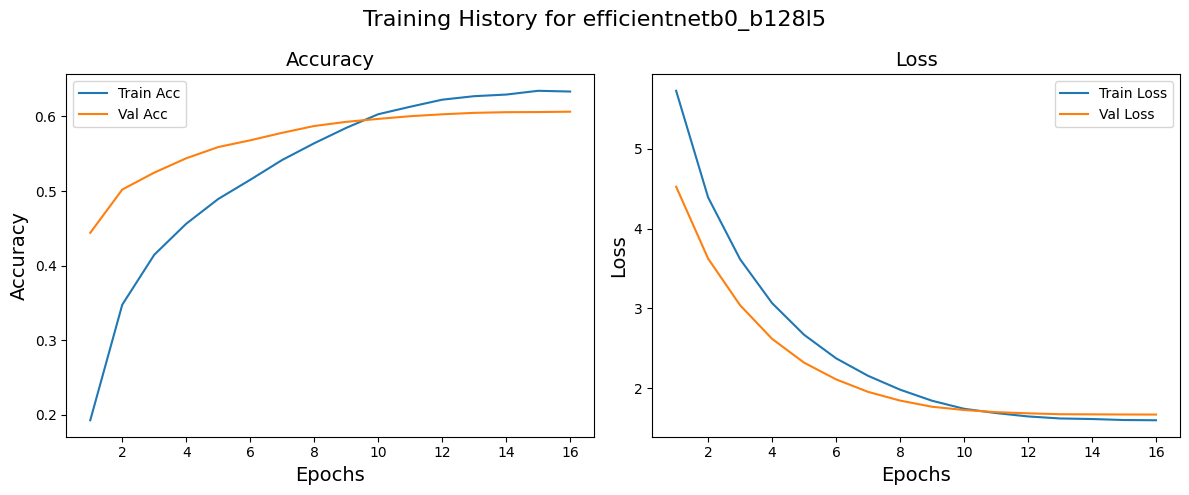

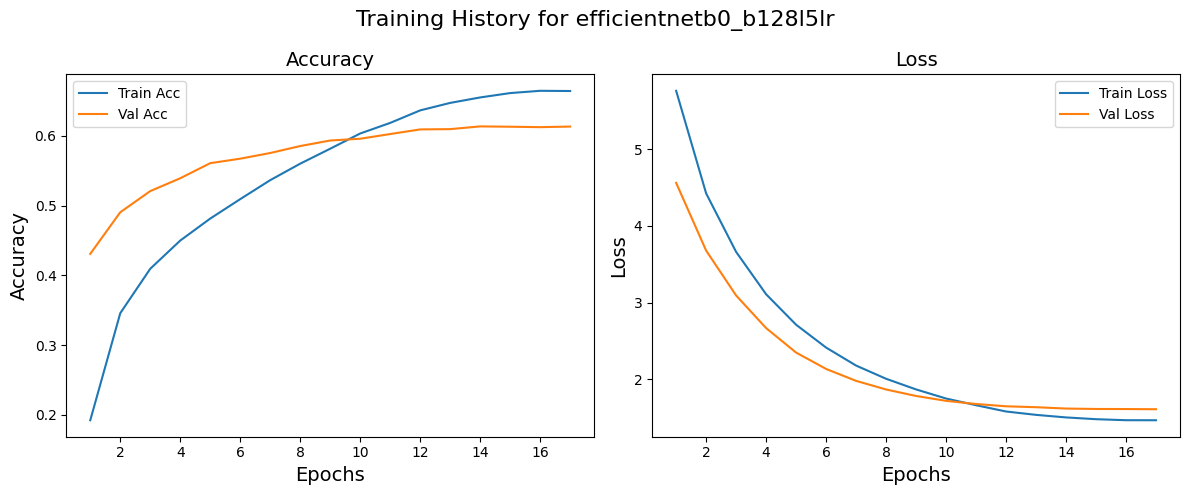

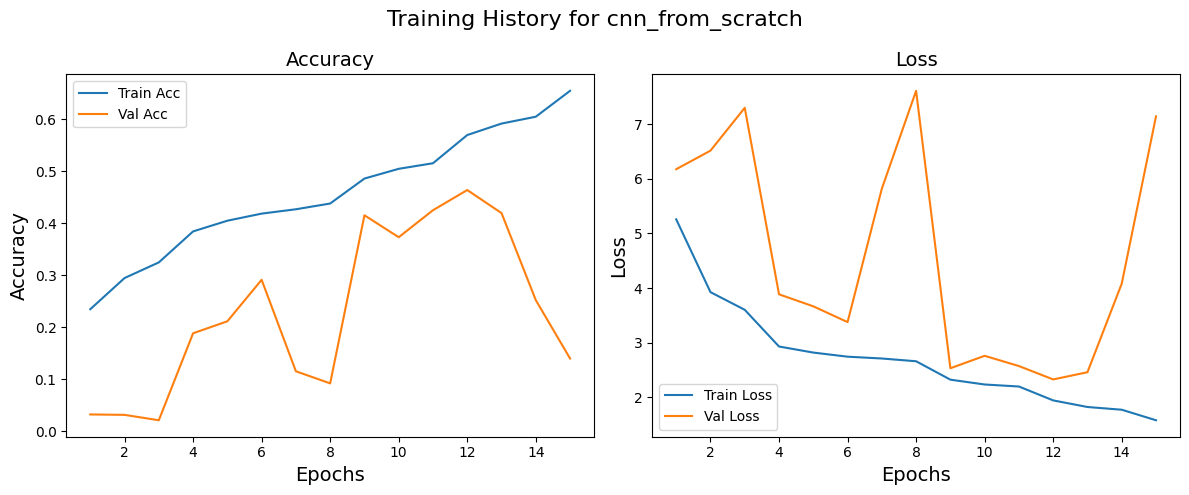

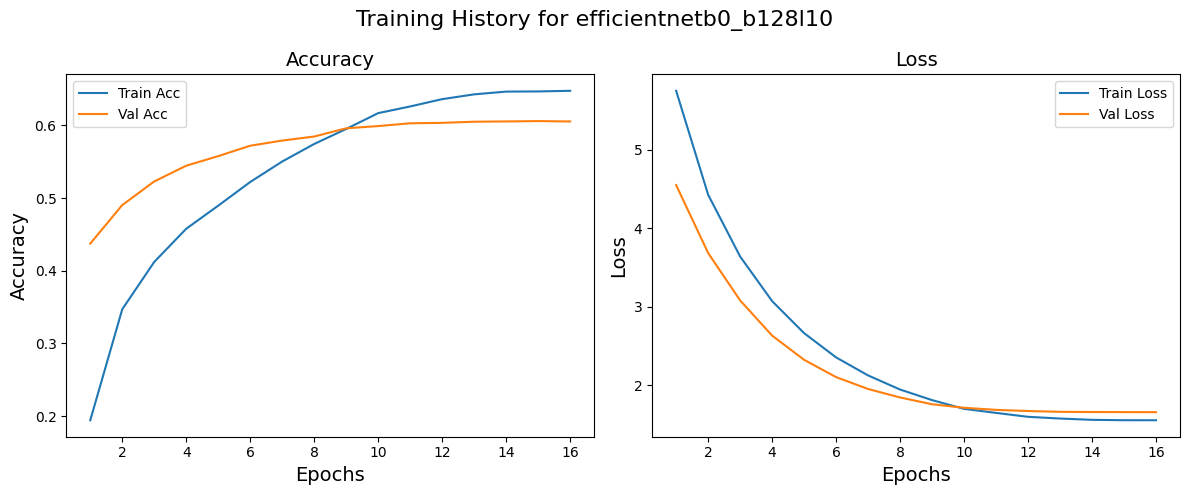

In [ ]:

directory_path = '' 
histories = load_histories(directory_path)

summary = summarize_histories(histories)
for item in sorted(summary, key=lambda x: x['best_val_acc'], reverse=True):
    print(item)

plot_histories(histories)

In [27]:
val_df = pd.read_csv("preprocessing/val_df.csv")
df_train_balanced = pd.read_csv("preprocessing/df_train_balanced.csv")
val_df.head()

,designation,description,productid,imageid,content_ratio,prdtypecode,label
0,Toupie Aquarium Nid D'abeilles Essaim - Pour Bébé,NaN,208857287,947204280,0.726000,1320,12
1,Petite Voiture Coupe Noir,NaN,1905945334,1111251337,1.000000,1280,7
2,Dies Découpe En Métal Stencil Pour Le Bricolag...,Dies découpe en métal Stencil pour le bricolag...,4182218337,1310107341,1.000000,1560,13
3,Parure De Lit 3d (4pcs) - Housse De Couette + ...,Matériel en Coton de haute qualité<br />teintu...,1299137055,1072208220,0.778320,1920,14
4,Vogue Deutsch 12 /1998,NaN,962932750,1050681732,0.750984,2280,18


In [15]:
from tensorflow.keras.models import load_model
model = load_model("image_models/efficientnetb0_b128l5_best_model.keras")

2025-06-09 17:31:33.714593: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-06-09 17:31:33.714787: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-09 17:31:33.714791: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-09 17:31:33.714830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-09 17:31:33.714860: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/denizaydin/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False

In [ ]:
def create_datasets(base_path, train_df, val_df, batch_size):
    def preprocess_image(imageid, productid, label, augmented):
        def _load_image(image_path):
            img = tf.io.read_file(image_path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, [224, 224])
            img = tf.keras.applications.efficientnet.preprocess_input(img)
            return img

        image_path = tf.strings.join([
            base_path,
            "image_",
            imageid,
            "_product_",
            productid,
            ".jpg"
        ])

        image = _load_image(image_path)

        def apply_augmentation(img):
            img = tf.image.random_flip_left_right(img)
            img = tf.image.random_brightness(img, max_delta=0.1)
            translations = tf.cast(tf.random.uniform([2], -10, 10), tf.int32)
            img = tf.roll(img, shift=translations[0], axis=0)  # vertical shift
            img = tf.roll(img, shift=translations[1], axis=1)  # horizontal shift
            return img

        image = tf.cond(augmented, lambda: apply_augmentation(image), lambda: image)

        return image, label

    train_image_ids = train_df["imageid"].astype(str).values
    train_product_ids = train_df["productid"].astype(str).values
    train_labels = train_df["label"].values
    train_aug_flags = train_df["augmented"].astype(bool).values

    train_ds = tf.data.Dataset.from_tensor_slices(
        (train_image_ids, train_product_ids, train_labels, train_aug_flags)
    )
    train_ds = train_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    train_ds = train_ds.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)


    val_image_ids = val_df["imageid"].astype(str).values
    val_product_ids = val_df["productid"].astype(str).values
    val_labels = val_df["label"].values
    val_aug_flags = [False] * len(val_df)

    val_ds = tf.data.Dataset.from_tensor_slices(
        (val_image_ids, val_product_ids, val_labels, val_aug_flags)
    )
    val_ds = val_ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return train_ds, val_ds

In [34]:
base_path = "images/image_train_zoomed/"
train_ds, val_ds = create_datasets(base_path, df_train_balanced, val_df, 128)

In [ ]:
label_to_prdtypecode = val_df.drop_duplicates("label").set_index("label")["prdtypecode"].to_dict()

y_true_original = [label_to_prdtypecode[label] for label in y_true]
y_pred_original = [label_to_prdtypecode[label] for label in y_pred]

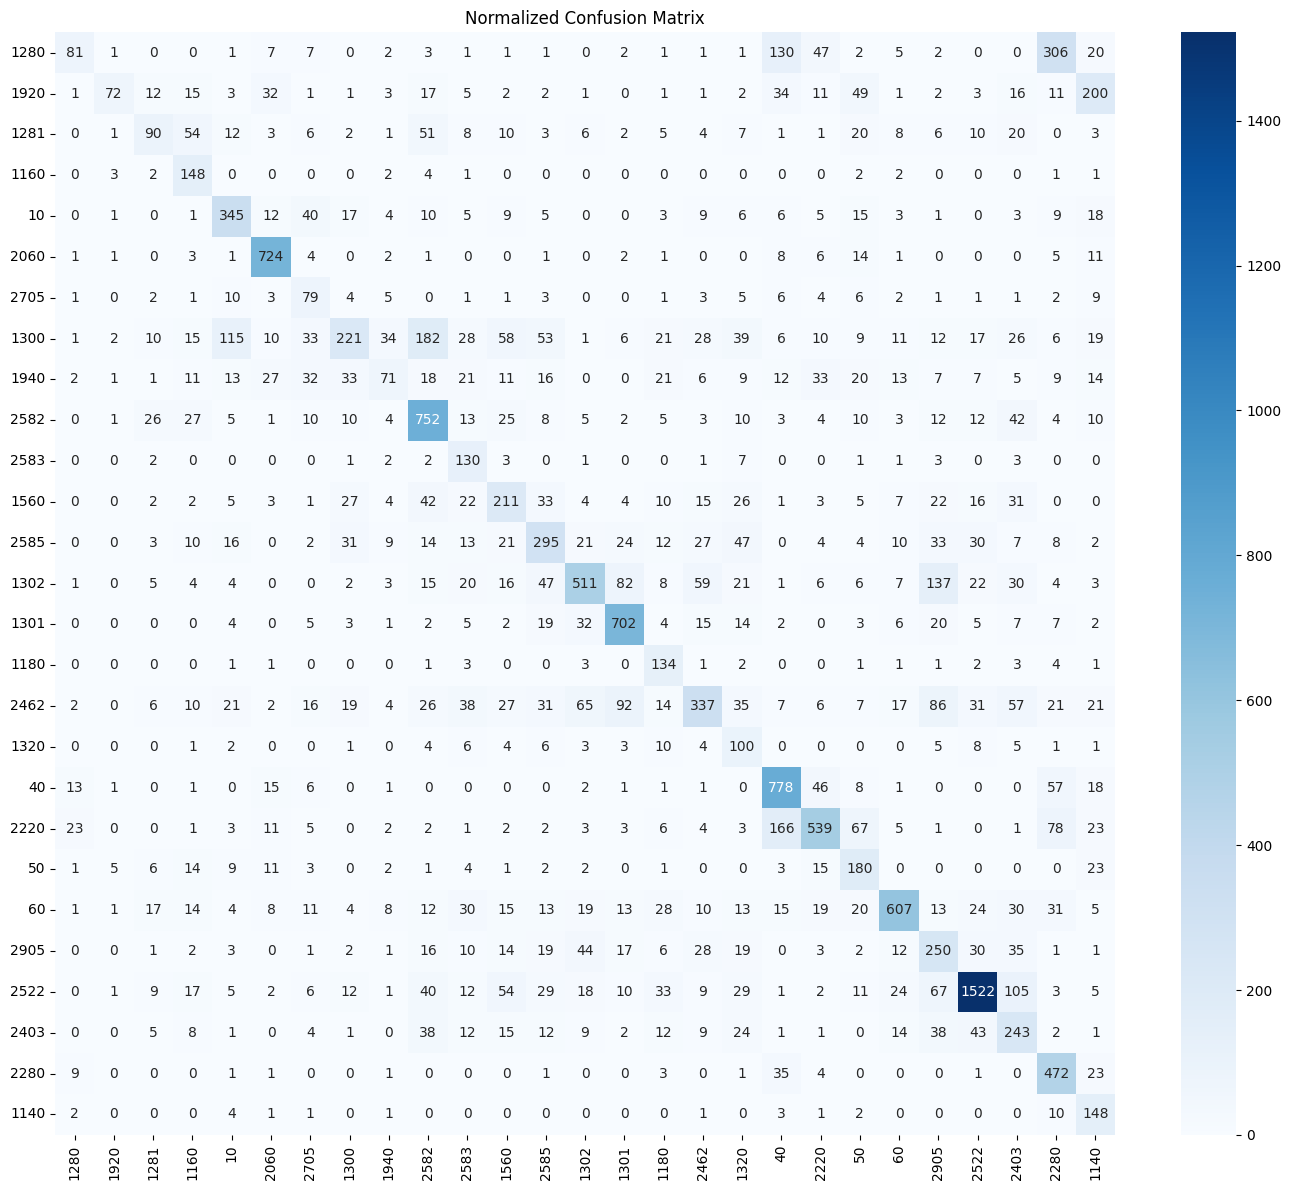

In [ ]:

cm = confusion_matrix(y_true_original, y_pred_original)
unique_codes = set(y_true_original + y_pred_original)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, xticklabels=unique_codes, yticklabels=unique_codes,
            annot=True, fmt='d', cmap="Blues", cbar=True)
plt.title("Normalized Confusion Matrix")
plt.tight_layout()
plt.show()

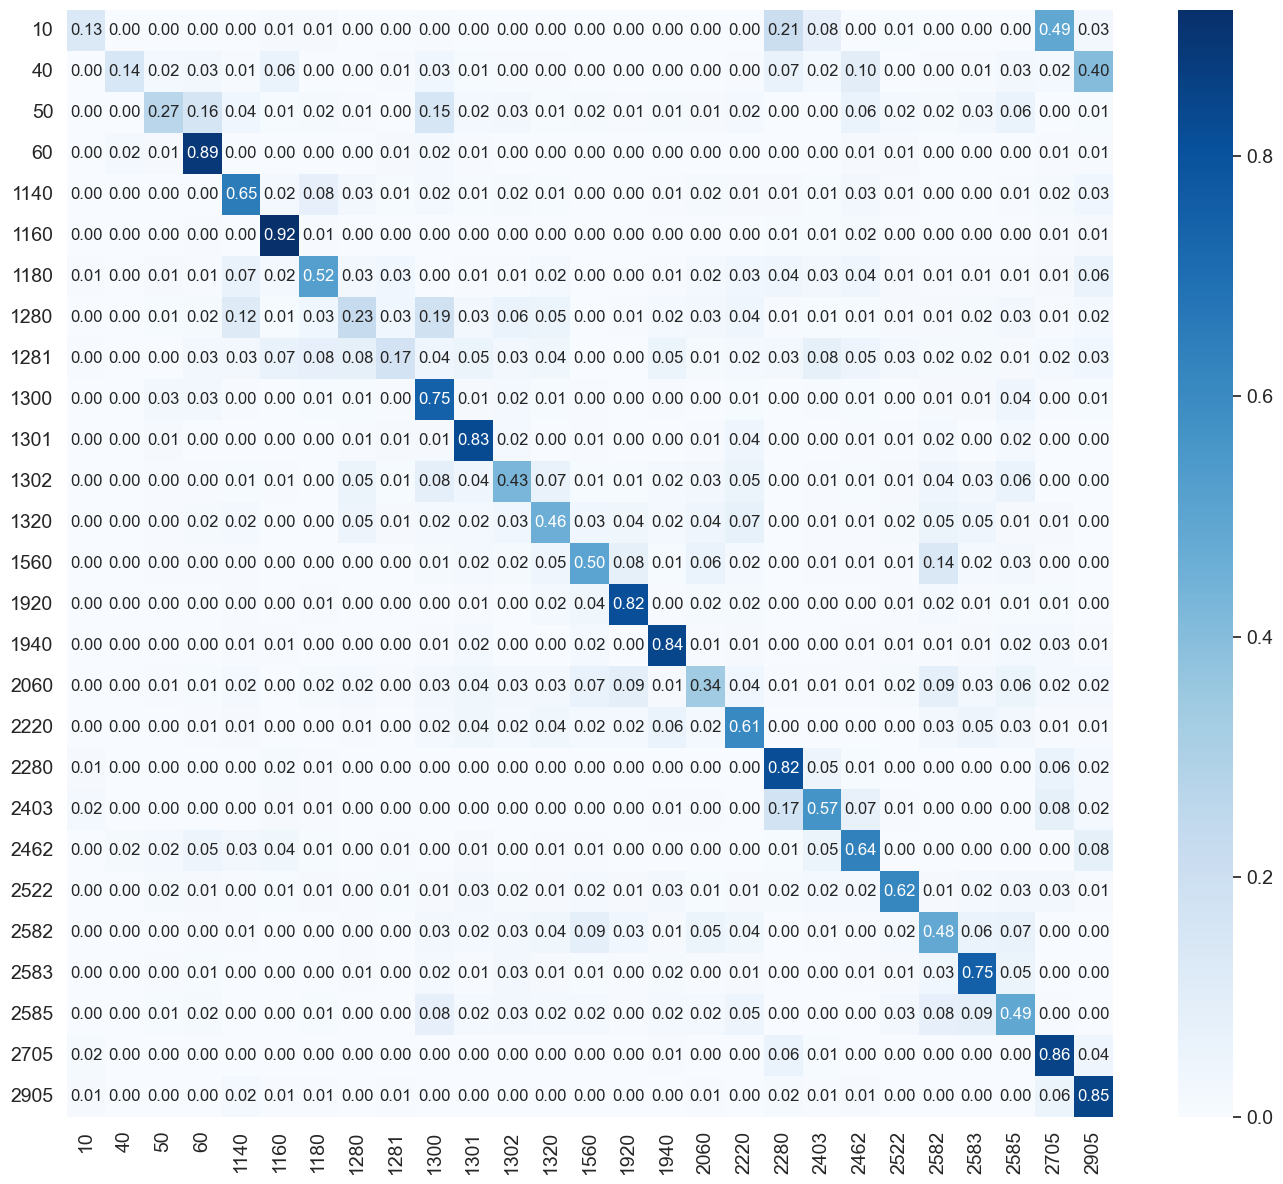

In [ ]:

cm = confusion_matrix(true_labels, pred_labels, normalize='true')
unique_codes = sorted(set(y_true_original + y_pred_original))

plt.figure(figsize=(14, 12))
ax= sns.heatmap(cm, xticklabels=unique_codes, yticklabels=unique_codes,
            annot=True, fmt=".2f", cmap="Blues", cbar=True)

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14, rotation=0)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
plt.tight_layout()
plt.show()

In [43]:
val_df.drop_duplicates("label").set_index("label")["prdtypecode"].to_dict()

{12: 1320,
 7: 1280,
 13: 1560,
 14: 1920,
 18: 2280,
 23: 2583,
 9: 1300,
 0: 10,
 5: 1160,
 3: 60,
 1: 40,
 16: 2060,
 22: 2582,
 25: 2705,
 21: 2522,
 19: 2403,
 2: 50,
 6: 1180,
 8: 1281,
 24: 2585,
 4: 1140,
 26: 2905,
 17: 2220,
 11: 1302,
 20: 2462,
 15: 1940,
 10: 1301}

In [106]:
from sklearn.metrics import classification_report
unique_codes = sorted(set(y_true_original + y_pred_original))
print(classification_report(y_true_original, y_pred_original, labels=unique_codes, digits=2))

              precision    recall  f1-score   support

          10       0.58      0.13      0.21       622
          40       0.79      0.14      0.24       498
          50       0.45      0.27      0.34       334
          60       0.41      0.89      0.56       166
        1140       0.59      0.65      0.62       527
        1160       0.83      0.92      0.87       786
        1180       0.29      0.52      0.37       151
        1280       0.57      0.23      0.32       973
        1281       0.42      0.17      0.24       413
        1300       0.60      0.75      0.67      1007
        1301       0.33      0.83      0.48       157
        1302       0.42      0.43      0.42       496
        1320       0.49      0.46      0.47       643
        1560       0.68      0.50      0.58      1014
        1920       0.73      0.82      0.77       860
        1940       0.39      0.84      0.54       159
        2060       0.59      0.34      0.43       998
        2220       0.24    

In [45]:
val_df.head(10)

,designation,description,productid,imageid,content_ratio,prdtypecode,label
0,Toupie Aquarium Nid D'abeilles Essaim - Pour Bébé,NaN,208857287,947204280,0.726000,1320,12
1,Petite Voiture Coupe Noir,NaN,1905945334,1111251337,1.000000,1280,7
2,Dies Découpe En Métal Stencil Pour Le Bricolag...,Dies découpe en métal Stencil pour le bricolag...,4182218337,1310107341,1.000000,1560,13
3,Parure De Lit 3d (4pcs) - Housse De Couette + ...,Matériel en Coton de haute qualité<br />teintu...,1299137055,1072208220,0.778320,1920,14
4,Vogue Deutsch 12 /1998,NaN,962932750,1050681732,0.750984,2280,18
5,Lin Coussin Sofa Taille Coussin Throw Cover Ho...,Lin Coussin Sofa taille coussin Throw Cover Ho...,4063431015,1284166711,0.846000,1920,14
6,Journal Officiel De La Republique Francaise N°...,NaN,440548263,1009224034,0.227424,2280,18
7,Diffuseur de chlore grand modèle - Graphite,<p>Diffuseur de chlore grand modèle - Graphite...,3924545147,1264192326,0.196612,2583,23
8,Le Livre De La Jungle * Mini Livre * Jouet Du ...,NaN,52199026,505024039,1.000000,1280,7
9,Moakoada®Cardan Boucle De Serrure Porte-Caméra...,Cardan boucle de serrure Porte-caméra PTZ Prot...,4057634640,1282537822,0.195216,1300,9


In [58]:
def get_all_predictions(model, val_ds):
    all_preds = []
    all_labels = []
    all_images = []

    for images, labels in val_ds:
        preds = model.predict(images, verbose=0)
        pred_labels = np.argmax(preds, axis=1)
        all_preds.extend(pred_labels)
        all_labels.extend(labels.numpy())

        # Store raw images too (denormalized)
        for img in images:
            img = img.numpy()
            img = (img + 1.0) * 127.5
            img = np.clip(img, 0, 255).astype(np.uint8)
            all_images.append(img)

    return np.array(all_preds), np.array(all_labels), np.array(all_images)

In [59]:
pred_labels, true_labels, images = get_all_predictions(model, val_ds)

2025-06-09 18:30:52.575644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [79]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_misclassified_images_from_disk(val_df, pred_labels, true_labels,
                                        label_to_prdtypecode,
                                        true_label_code, pred_label_code,
                                        base_path="images/image_train_zoomed/",
                                        n_images=4):

    prdtypecode_to_label = {v: k for k, v in label_to_prdtypecode.items()}
    true_label = prdtypecode_to_label[true_label_code]
    pred_label = prdtypecode_to_label[pred_label_code]

    indices = np.where((true_labels == true_label) & (pred_labels == pred_label))[0]

    if len(indices) == 0:
        print(f"No images found with True label = {true_label_code} and Predicted label = {pred_label_code}")
        return

    n = min(n_images, len(indices))
    chosen_indices = random.sample(indices.tolist(), n)

    plt.figure(figsize=(10, 10))

    for i, idx in enumerate(chosen_indices):
        row = val_df.iloc[idx]
        imageid = str(row["imageid"])
        productid = str(row["productid"])

        # Build path as per your pattern
        image_path = base_path + f"image_{imageid}_product_{productid}.jpg"

        # Load image using tf.io and decode
        img_raw = tf.io.read_file(image_path)
        img = tf.image.decode_jpeg(img_raw, channels=3)
        img = img.numpy()

        plt.subplot(2, 2, i + 1)
        plt.imshow(img)
        #plt.title(f"True: {true_label_code}\nPred: {pred_label_code}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\nCorresponding val_df rows:")
    print(val_df.iloc[chosen_indices])
    print(indices)


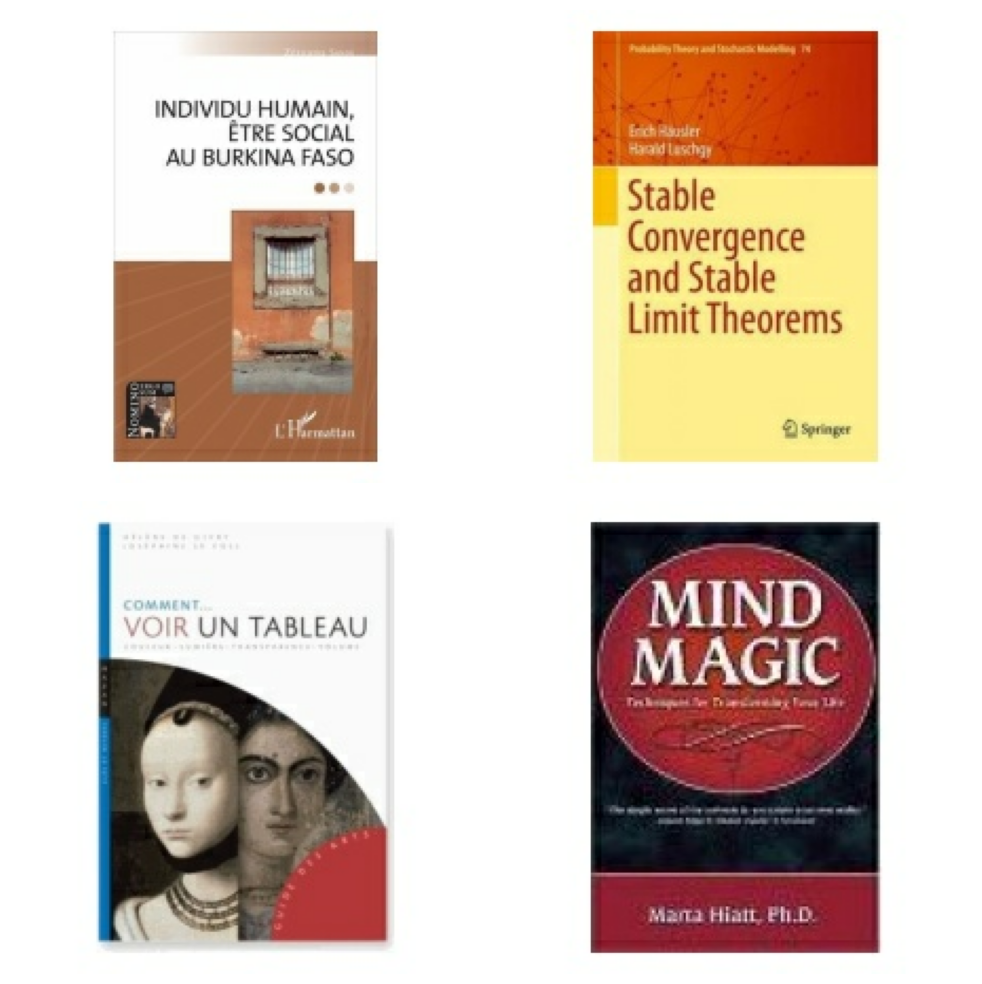


Corresponding val_df rows:
                                            designation description  \
14703       Individu Humain Être Social Au Burkina Faso         NaN   
561        Stable Convergence And Stable Limit Theorems         NaN   
9903                            Comment Voir Un Tableau         NaN   
14444  Mind Magic Techniques For Transforming Your Life         NaN   

        productid     imageid  content_ratio  prdtypecode  label  
14703  1940871807  1242377626       0.614000           10      0  
561     600396280  1126858202       0.664000           10      0  
9903    562228723  1283480342       0.657072           10      0  
14444    52850977   525465130       0.053200           10      0  
[  112   255   288   369   394   554   561   674   686   708   732   773
   810   928  1009  1158  1304  1305  1330  1363  1385  1414  1461  1467
  1470  1561  1596  1661  1706  1710  1776  1820  1857  1912  1946  1955
  1983  1991  2012  2049  2092  2111  2327  2368  2382  2396  

In [115]:
plot_misclassified_images_from_disk(val_df, pred_labels, true_labels,
                                   label_to_prdtypecode,
                                   true_label_code=10,
                                   pred_label_code=2705,
                                   n_images=4)

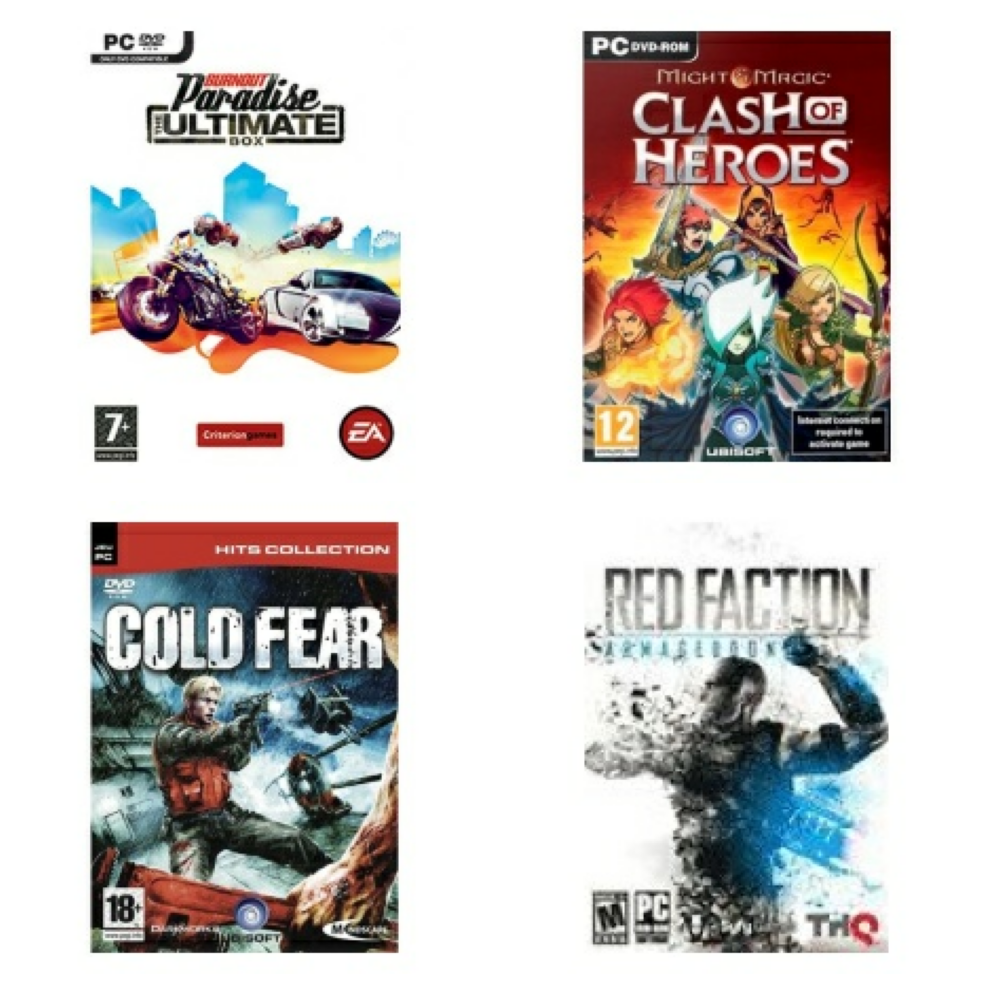


Corresponding val_df rows:
                           designation description  productid    imageid  \
15559    Burnout Paradise Ultimate Box         NaN   74244635  874732437   
11731  Might & Magic - Clash Of Heroes         NaN  196228264  941425130   
11317      Cold Fear - Hits Collection         NaN   76065894  874730589   
15845         Red Faction - Armageddon         NaN  152928322  908507180   

       content_ratio  prdtypecode  label  
15559       0.712256           40      1  
11731       0.716000           40      1  
11317       0.722000           40      1  
15845       0.071868           40      1  
[  355   374   449   489   678   870   887   899   957  1022  1236  1239
  1246  1292  1476  1494  1577  1612  1784  1822  2004  2018  2060  2163
  2274  2330  2384  2523  2694  2735  2758  2964  3110  3180  3200  3259
  3262  3473  3561  3589  3650  3673  3720  3796  3827  4038  4153  4258
  4259  4338  4365  4373  4435  4481  4494  4501  4518  4529  4565  4726
  4790  485

In [120]:
plot_misclassified_images_from_disk(val_df, pred_labels, true_labels,
                                   label_to_prdtypecode,
                                   true_label_code=40,
                                   pred_label_code=2905,
                                   n_images=4)